# CLASS 10 / Classification / Abalone dataset

In [218]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

from sklearn import preprocessing, neighbors, grid_search, tree, ensemble, metrics, cross_validation, externals

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [219]:
#Dataset
df = pd.read_csv(os.path.join('..', 'datasets', 'abalone.csv'))
df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [220]:
df.isnull().sum()

Sex              0
Length           0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Rings            0
dtype: int64

In [174]:
df.describe()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [175]:
df.corr()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
WholeWeight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
ShuckedWeight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
VisceraWeight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
ShellWeight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [221]:
color = df.Sex.map({'F': 'red', 'I': 'green', 'M': 'blue'})

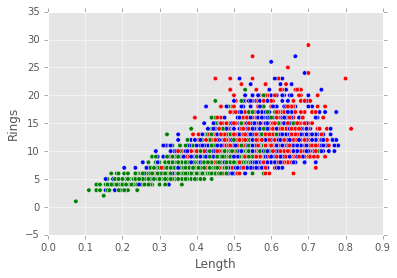

In [222]:
df.plot(x = 'Length', y = 'Rings', kind = 'scatter', c = color)

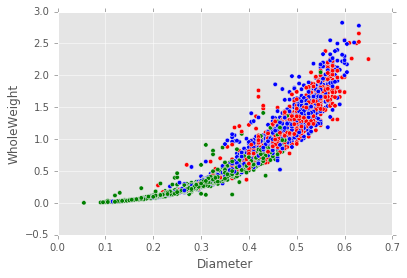

In [178]:
df.plot(x = 'Diameter', y = 'WholeWeight', kind = 'scatter', c = color)

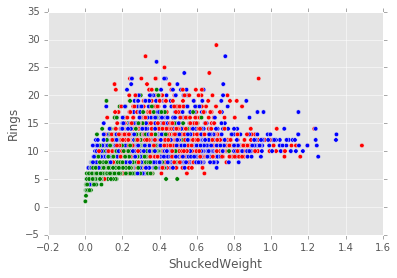

In [179]:
df.plot(x = 'ShuckedWeight', y = 'Rings', kind = 'scatter', c = color)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x15944ff50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x15d503950>]], dtype=object)

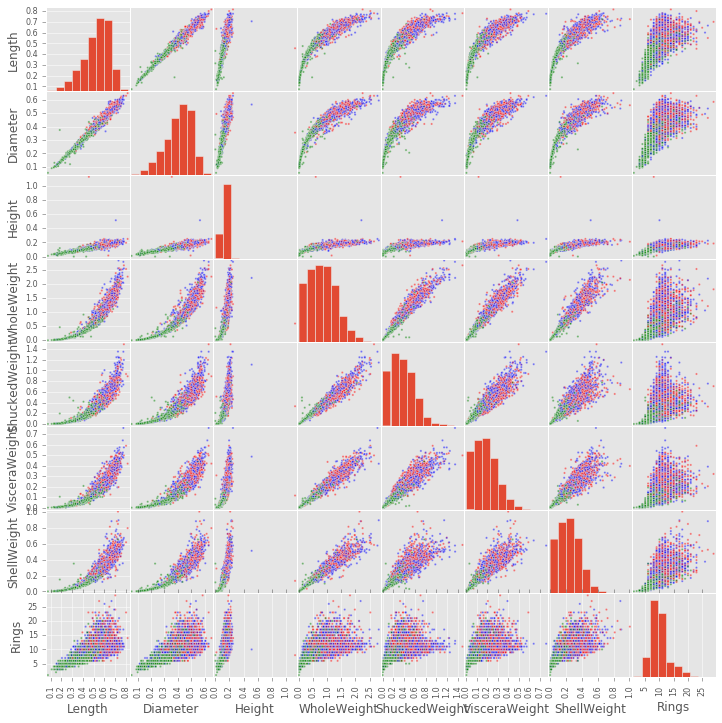

In [223]:
pd.tools.plotting.scatter_matrix(df, c = color, figsize=(12, 12))

In [224]:
c = df.Sex

In [225]:
df_whole = df[df.WholeWeight < (df.ShuckedWeight+df.VisceraWeight+df.ShellWeight)]
len(df_whole)


155

In [226]:
df_sh = df[df.WholeWeight < (df.ShuckedWeight)]
len(df_sh)

4

In [227]:
df_vs = df[df.WholeWeight < (df.VisceraWeight)]
len(df_vs) 

0

In [228]:
df_shell = df[df.WholeWeight < (df.ShellWeight)]
len(df_shell)

1

In [229]:
df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [230]:
df['Volume'] = (df.Length/2 * df.Diameter/2 * df.Height* np.pi)
Volume

0       0.012391
1       0.006556
2       0.023602
3       0.015767
4       0.005287
          ...   
4172    0.032948
4173    0.027525
4174    0.045887
4175    0.035711
4176    0.060350
dtype: float64

In [231]:
df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Volume
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0.012391
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0.006556
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0.023602
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0.015767
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0.005287


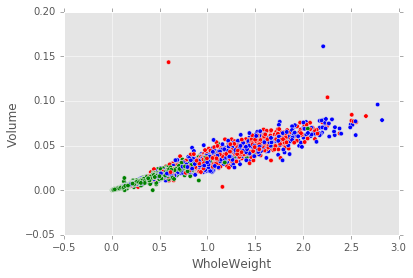

In [232]:
df.plot(x = 'WholeWeight', y = 'Volume', kind = 'scatter', c = color)

In [233]:
df['Density'] = (df.WholeWeight/df.Volume)
df.head()

,Sex,Length,Diameter,Height,WholeWeight,...,VisceraWeight,ShellWeight,Rings,Volume,Density
0,M,0.455,0.365,0.095,0.5140,...,0.1010,0.150,15,0.012391,41.480633
1,M,0.350,0.265,0.090,0.2255,...,0.0485,0.070,7,0.006556,34.395390
2,F,0.530,0.420,0.135,0.6770,...,0.1415,0.210,9,0.023602,28.684010
3,M,0.440,0.365,0.125,0.5160,...,0.1140,0.155,10,0.015767,32.726855
4,I,0.330,0.255,0.080,0.2050,...,0.0395,0.055,7,0.005287,38.772149


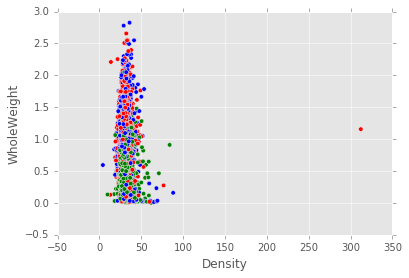

In [204]:
df.plot(x = 'Density', y = 'WholeWeight', kind = 'scatter', c = color)

In [234]:
df.drop(df[df.Volume == 0].index, inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14e349b90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x14d3d0ad0>]], dtype=object)

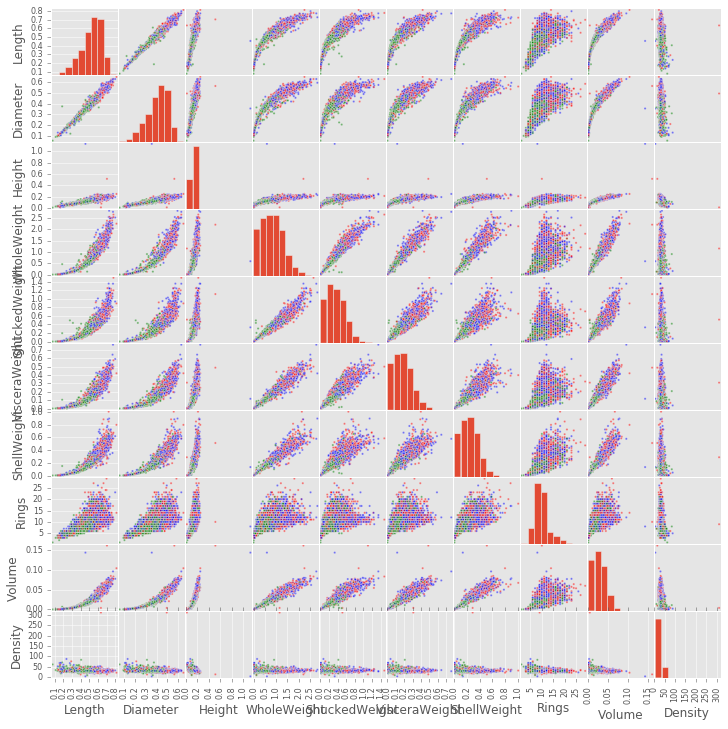

In [209]:
pd.tools.plotting.scatter_matrix(df, c = color, figsize=(12, 12))

In [23]:
c.unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24])

# Trying to build model for Rings (AGE)

In [30]:
X = df[ ['Length', 'Height', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight'] ]

scaler = preprocessing.MinMaxScaler().fit(X)

X = scaler.transform(X)

In [32]:
model = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'uniform').\
    fit(X, c)

In [33]:
k = range(1, df.shape[0])

score_df = pd.DataFrame({'k': k})

score_df['model'] = score_df.\
    apply(lambda row: neighbors.KNeighborsClassifier(n_neighbors = row['k']).fit(X, c), axis = 1)

score_df['score'] = score_df.model.apply(lambda model: model.score(X, c))

# Our poor results =>

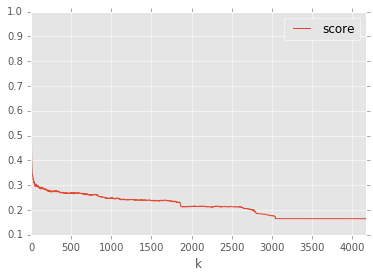

In [34]:
score_df.plot(x = 'k', y = 'score')

In [37]:
score_df[score_df.score>0.5]

,k,model,score
0,1,"KNeighborsClassifier(algorithm='auto', leaf_si...",1.000000
1,2,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.592770
2,3,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.509217


# Tried to subset by sex (Male) and build a model

In [40]:
df_male = df[df.Sex == 'M']

In [41]:
df_male

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
11,M,0.430,0.350,0.110,0.4060,0.1675,0.0810,0.1350,10
...,...,...,...,...,...,...,...,...,...
4170,M,0.550,0.430,0.130,0.8395,0.3155,0.1955,0.2405,10
4171,M,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290,8
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [42]:
c = df_male.Rings

In [43]:
Xm = df_male[ ['Diameter', 'WholeWeight'] ]

scaler_m = preprocessing.MinMaxScaler().fit(Xm)

Xm = scaler_m.transform(Xm)

In [44]:
model = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'uniform').\
    fit(Xm, c)

In [46]:
k = range(1, 100)

score_df_male = pd.DataFrame({'k': k})

score_df_male['model'] = score_df_male.\
    apply(lambda row: neighbors.KNeighborsClassifier(n_neighbors = row['k']).fit(Xm, c), axis = 1)

score_df_male['score'] = score_df_male.model.apply(lambda model: model.score(Xm, c))

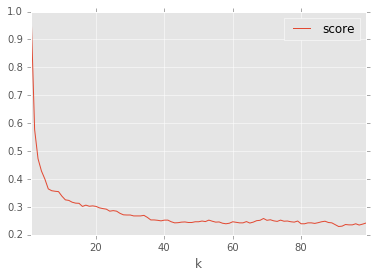

In [47]:
score_df_male.plot(x = 'k', y = 'score')

# Train / Test 

In [216]:
c = df.Sex

In [210]:
train_df = df.sample(frac = .6, random_state = 0).sort_index()

In [211]:
train_df

,Sex,Length,Diameter,Height,WholeWeight,...,VisceraWeight,ShellWeight,Rings,Volume,Density
1,M,0.350,0.265,0.090,0.2255,...,0.0485,0.0700,7,0.006556,34.395390
2,F,0.530,0.420,0.135,0.6770,...,0.1415,0.2100,9,0.023602,28.684010
4,I,0.330,0.255,0.080,0.2050,...,0.0395,0.0550,7,0.005287,38.772149
5,I,0.425,0.300,0.095,0.3515,...,0.0775,0.1200,8,0.009513,36.948912
6,F,0.530,0.415,0.150,0.7775,...,0.1415,0.3300,20,0.025912,30.005115
...,...,...,...,...,...,...,...,...,...,...,...
4168,F,0.515,0.400,0.125,0.6150,...,0.1230,0.1765,8,0.020224,30.409410
4169,M,0.520,0.385,0.165,0.7910,...,0.1800,0.1815,10,0.025944,30.488677
4170,M,0.550,0.430,0.130,0.8395,...,0.1955,0.2405,10,0.024147,34.766128
4171,M,0.560,0.430,0.155,0.8675,...,0.1720,0.2290,8,0.029314,29.593165


In [212]:
test_df = df.drop(train_df.index)

In [213]:
test_df

,Sex,Length,Diameter,Height,WholeWeight,...,VisceraWeight,ShellWeight,Rings,Volume,Density
0,M,0.455,0.365,0.095,0.5140,...,0.1010,0.1500,15,0.012391,41.480633
3,M,0.440,0.365,0.125,0.5160,...,0.1140,0.1550,10,0.015767,32.726855
7,F,0.545,0.425,0.125,0.7680,...,0.1495,0.2600,16,0.022740,33.773486
12,M,0.490,0.380,0.135,0.5415,...,0.0950,0.1900,11,0.019743,27.428063
16,I,0.355,0.280,0.085,0.2905,...,0.0395,0.1150,7,0.006636,43.777499
...,...,...,...,...,...,...,...,...,...,...,...
4166,I,0.475,0.365,0.115,0.4990,...,0.0885,0.1560,10,0.015659,31.865912
4173,M,0.590,0.440,0.135,0.9660,...,0.2145,0.2605,10,0.027525,35.095286
4174,M,0.600,0.475,0.205,1.1760,...,0.2875,0.3080,9,0.045887,25.628236
4175,F,0.625,0.485,0.150,1.0945,...,0.2610,0.2960,10,0.035711,30.648757


In [235]:
train_X, test_X, train_c, test_c = cross_validation.train_test_split(X, c, train_size = .6, random_state = 0)

In [260]:
train_X = train_df[ ['Volume', 'ShellWeight', 'Density', 'Rings'] ]

scaler = preprocessing.MinMaxScaler().fit(train_X)

train_X = scaler.transform(train_X)

train_c = train_df.Sex

model = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'uniform').\
    fit(train_X, train_c)

model.score(train_X, train_c)

0.66626746506986023

In [261]:
test_X = test_df[  ['Volume', 'ShellWeight', 'Density', 'Rings'] ]

test_X = scaler.transform(test_X)

test_c = test_df.Sex

model.score(test_X, test_c)

0.52035928143712573

In [ ]:
k_cv = 5 # 5-fold CV
k_nn = range(1, 100 * (k_cv - 1) / k_cv) # k-NN

gs = grid_search.GridSearchCV(
    estimator = neighbors.KNeighborsClassifier(),
    param_grid = {'n_neighbors': k_nn, 'weights': ['uniform', 'distance']},
    cv = cross_validation.KFold(train_df.shape[0], n_folds = k_cv)
)

gs.fit(train_X, train_c)

score_df = pd.DataFrame({'k': [score.parameters['n_neighbors'] for score in gs.grid_scores_],
    'weights': [score.parameters['weights'] for score in gs.grid_scores_],
    'score': [score.mean_validation_score for score in gs.grid_scores_]})

score_df

# Problem change and new model

In [58]:
def my_first_classifier(row):
    if row.Sex == 'I':
        return 1
    else:
        return 0
   
Infant = df.apply(my_first_classifier, axis = 1)

cat=Infant.rename("Infant")

df=df.join(cat)

In [59]:
df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Infant
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1


In [63]:
train_df = df.sample(frac = .6, random_state = 0).sort_index()

In [64]:
test_df = df.drop(train_df.index)

In [65]:
train_X = train_df[ ['WholeWeight', 'Height', 'Diameter', 'Rings'] ]

scaler = preprocessing.MinMaxScaler().fit(train_X)

train_X = scaler.transform(train_X)

train_c = train_df.Infant

model = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'uniform').\
    fit(train_X, train_c)

model.score(train_X, train_c)

0.86033519553072624

In [66]:
test_X = test_df[  ['WholeWeight', 'Height', 'Diameter', 'Rings'] ]

test_X = scaler.transform(test_X)

test_c = test_df.Infant

model.score(test_X, test_c)

0.82585278276481144

In [68]:
k = range(1, 100)

score_df = pd.DataFrame({'k': k})

score_df['model'] = score_df.\
    apply(lambda row: neighbors.KNeighborsClassifier(n_neighbors = row['k']).fit(X, c), axis = 1)

score_df['score'] = score_df.model.apply(lambda model: model.score(X, c))

In [69]:
score_df

,k,model,score
0,1,"KNeighborsClassifier(algorithm='auto', leaf_si...",1.000000
1,2,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.742399
2,3,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.733062
3,4,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.695715
4,5,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.675365
...,...,...,...
94,95,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.565956
95,96,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.564041
96,97,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.563802
97,98,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.563802


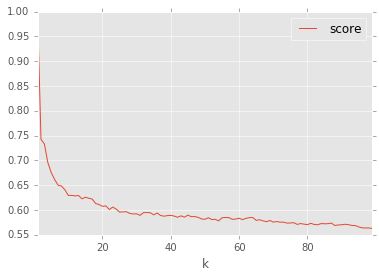

In [70]:
score_df.plot(x = 'k', y = 'score')

In [72]:
k_cv = 5 # 5-fold CV
k_nn = range(1, 100 * (k_cv - 1) / k_cv) # k-NN

gs = grid_search.GridSearchCV(
    estimator = neighbors.KNeighborsClassifier(),
    param_grid = {'n_neighbors': k_nn, 'weights': ['uniform', 'distance']},
    cv = cross_validation.KFold(train_df.shape[0], n_folds = k_cv)
)

gs.fit(train_X, train_c)

score_df = pd.DataFrame({'k': [score.parameters['n_neighbors'] for score in gs.grid_scores_],
    'weights': [score.parameters['weights'] for score in gs.grid_scores_],
    'score': [score.mean_validation_score for score in gs.grid_scores_]})

score_df

,k,score,weights
0,1,0.766560,uniform
1,1,0.766560,distance
2,2,0.777733,uniform
3,2,0.766560,distance
4,3,0.783719,uniform
...,...,...,...
153,77,0.814445,distance
154,78,0.816441,uniform
155,78,0.813647,distance
156,79,0.815243,uniform


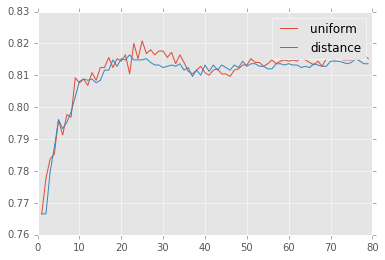

In [73]:
score_uniform_df = score_df[score_df.weights == 'uniform']
plt.plot(score_uniform_df.k, score_uniform_df.score, label = 'uniform')

score_distance_df = score_df[score_df.weights == 'distance']
plt.plot(score_distance_df.k, score_distance_df.score, label = 'distance')

plt.legend()

In [ ]:
REGRESSION DECISION TREES

In [84]:
df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [85]:
df_s = pd.get_dummies(df.Sex, prefix = 'S')
df_s.head()

,S_F,S_I,S_M
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0


In [86]:
df_s.rename(columns = {'S_F': 'F',
                           'S_I': 'I',
                           'S_M': 'M'}, inplace = True)

In [87]:
df = df.join([df_s])
df.head()

,Sex,Length,Diameter,Height,WholeWeight,...,ShellWeight,Rings,F,I,M
0,M,0.455,0.365,0.095,0.5140,...,0.150,15,0.0,0.0,1.0
1,M,0.350,0.265,0.090,0.2255,...,0.070,7,0.0,0.0,1.0
2,F,0.530,0.420,0.135,0.6770,...,0.210,9,1.0,0.0,0.0
3,M,0.440,0.365,0.125,0.5160,...,0.155,10,0.0,0.0,1.0
4,I,0.330,0.255,0.080,0.2050,...,0.055,7,0.0,1.0,0.0


In [88]:
df.drop(['Sex'], axis = 1, inplace = True)

In [89]:
X = df[df.columns.values]
X.drop('Rings', axis = 1, inplace = True)

y = df.Rings

In [90]:
df.head()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,...,ShellWeight,Rings,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,...,0.150,15,0.0,0.0,1.0
1,0.350,0.265,0.090,0.2255,0.0995,...,0.070,7,0.0,0.0,1.0
2,0.530,0.420,0.135,0.6770,0.2565,...,0.210,9,1.0,0.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,...,0.155,10,0.0,0.0,1.0
4,0.330,0.255,0.080,0.2050,0.0895,...,0.055,7,0.0,1.0,0.0


In [91]:
train_X, test_X, train_y, test_y = cross_validation.train_test_split(X, y, train_size = .6, random_state = 0)

In [92]:
model = tree.DecisionTreeRegressor(random_state = 0).\
    fit(train_X, train_y)

In [93]:
model = tree.DecisionTreeRegressor(random_state = 0).\
    fit(train_X, train_y)

In [94]:
train_y_hat = model.predict(train_X)
print np.sqrt(metrics.mean_squared_error(train_y, train_y_hat))

test_y_hat = model.predict(test_X)
print np.sqrt(metrics.mean_squared_error(test_y, test_y_hat))

0.0
3.06004149966


In [95]:
model = tree.DecisionTreeRegressor(max_depth = 5, random_state = 0).\
    fit(train_X, train_y)

Most important features

In [96]:
sorted(zip(model.feature_importances_, X.columns.values), reverse = True)

[(0.7962753691375275, 'ShellWeight'),
 (0.14862091645866524, 'ShuckedWeight'),
 (0.033937778710198312, 'I'),
 (0.01451546818446459, 'Length'),
 (0.0053864611072073059, 'Height'),
 (0.00050000328241773173, 'VisceraWeight'),
 (0.00043001355565722252, 'F'),
 (0.00033398956386202974, 'Diameter'),
 (0.0, 'WholeWeight'),
 (0.0, 'M')]

In [112]:
level_2 = ((df.Rings > 4) & (df.Rings <=7))
level_3 = ((df.Rings > 7) & (df.Rings <=12))
level_4 = ((df.Rings > 12) & (df.Rings <=16))
level_5 = (df.Rings > 16)

df['Rings_Category'] = '1'
df.loc[level_2, 'Rings_Category'] = '2'
df.loc[level_3, 'Rings_Category'] = '3'
df.loc[level_4, 'Rings_Category'] = '4'
df.loc[level_5, 'Rings_Category'] = '5'

In [113]:
X = df[df.columns.values]
X.drop(['Rings', 'Rings_Category'], axis = 1, inplace = True)

y = df.Rings_Category

In [114]:
train_X, test_X, train_y, test_y = cross_validation.train_test_split(X, y, train_size = .6, random_state = 0)

In [115]:
model = tree.DecisionTreeClassifier(max_depth = 2,
    min_samples_leaf = 5,
    random_state = 0).\
        fit(train_X, train_y)

In [116]:
cross_validation.cross_val_score(model, train_X, train_y, cv = 10).mean()

0.70719039685575447

In [117]:
sorted(zip(model.feature_importances_, X.columns.values), reverse = True)

[(0.88399371928528869, 'ShellWeight'),
 (0.11600628071471128, 'VisceraWeight'),
 (0.0, 'WholeWeight'),
 (0.0, 'ShuckedWeight'),
 (0.0, 'M'),
 (0.0, 'Length'),
 (0.0, 'I'),
 (0.0, 'Height'),
 (0.0, 'F'),
 (0.0, 'Diameter')]

In [118]:
model = ensemble.RandomForestClassifier(n_estimators = 1000,
        max_features = 5,
        min_samples_leaf = 5,
        oob_score = True,
        random_state = 0).\
    fit(train_X, train_y)

In [119]:
cross_validation.cross_val_score(model, train_X, train_y, cv = 10).mean()

0.74233251225944064

In [125]:
print df.Rings.value_counts()

 9     689
10    634
8     568
11    487
7     391
     ... 
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64


In [126]:
train_y_hat = model.predict(train_X)
print np.sqrt(metrics.mean_squared_error(train_y, train_y_hat))

test_y_hat = model.predict(test_X)
print np.sqrt(metrics.mean_squared_error(test_y, test_y_hat))

0.465060131357
0.596217882167


In [128]:
model.score(train_X, train_y)

0.85315243415802078

In [129]:
model.score(test_X, test_y)

0.72710951526032319